In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import shutil

### **Dataset:**

Can be found here for download: [animals10_kaggle](https://www.kaggle.com/datasets/alessiocorrado99/animals10/data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your dataset
original_dataset_path = '/content/drive/My Drive/CECS456_Data/animals10/raw-img'
translated_dataset_path = '/content/animals10-translated'

Mounted at /content/drive


### Nathan Venier's Code:

Translating from Italian to English

**RUN ONLY ONCE**

In [ ]:
# Key pairings provided on Kaggle
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
    "ragno": "spider"
}

if not os.path.exists(translated_dataset_path):
    os.makedirs(translated_dataset_path)

for italian_name, english_name in translate.items():
    original_class_path = os.path.join(original_dataset_path, italian_name)
    translated_class_path = os.path.join(translated_dataset_path, english_name)
    if os.path.exists(original_class_path):
        shutil.copytree(original_class_path, translated_class_path)

Preprocessing:

In [ ]:
# Create an ImageDataGenerator (where our ResNet is) for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% Split
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Training Set
train_data = datagen.flow_from_directory(
    translated_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Set
validation_data = datagen.flow_from_directory(
    translated_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 21056 images belonging to 10 classes.
Found 5259 images belonging to 10 classes.


Nathan's CNN model:

In [ ]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Training:

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)

Epoch 1/20
658/658 [==============================] - 249s 375ms/step - loss: 1.8847 - accuracy: 0.3414 - val_loss: 1.5069 - val_accuracy: 0.4759
Epoch 2/20
658/658 [==============================] - 258s 392ms/step - loss: 1.4730 - accuracy: 0.4978 - val_loss: 1.3007 - val_accuracy: 0.5531
Epoch 3/20
658/658 [==============================] - 256s 389ms/step - loss: 1.2853 - accuracy: 0.5630 - val_loss: 1.1675 - val_accuracy: 0.5988
Epoch 4/20
658/658 [==============================] - 260s 394ms/step - loss: 1.1668 - accuracy: 0.6039 - val_loss: 1.1209 - val_accuracy: 0.6165
Epoch 5/20
658/658 [==============================] - 256s 389ms/step - loss: 1.0723 - accuracy: 0.6323 - val_loss: 1.0504 - val_accuracy: 0.6408
Epoch 6/20
658/658 [==============================] - 240s 365ms/step - loss: 1.0197 - accuracy: 0.6534 - val_loss: 1.0180 - val_accuracy: 0.6458
Epoch 7/20
658/658 [==============================] - 254s 387ms/step - loss: 0.9730 - accuracy: 0.6698 - val_loss: 0.9731 -

Evaluation:

NameError: name 'history' is not defined

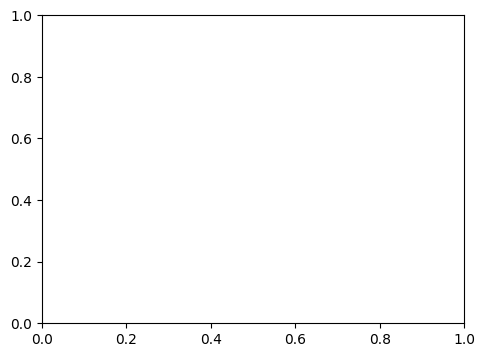

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Rodrigo's Model

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% Split
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Training Set
train_data = datagen.flow_from_directory(
    translated_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Set
validation_data = datagen.flow_from_directory(
    translated_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

training took about 2 hours

In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)


In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()